<a href="https://colab.research.google.com/github/adiganesh2004/Handwritten_digit_recognition/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

In [ ]:
#load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


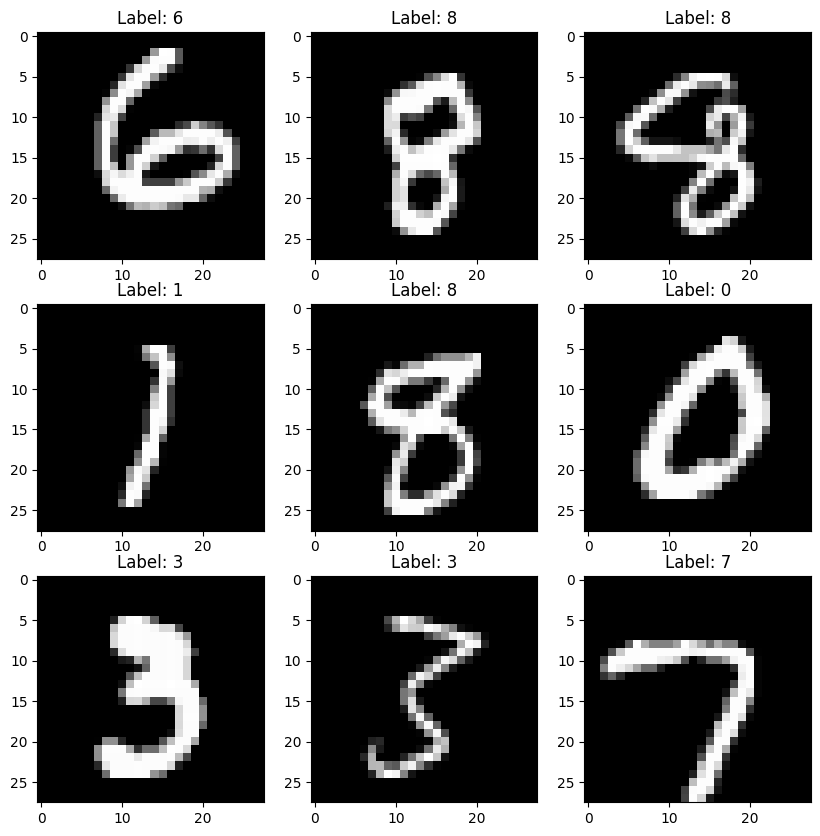

In [ ]:
# Show first 9 images from the dataset
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
# Normalizing the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Reshape for CNN (Adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split into Train (80%), Validation (10%), and Test (10%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)

In [ ]:
model = keras.Sequential([
    # Layer 1: Convolutional Layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2, 2),

    # Layer 2: Deeper Convolutional Layer
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2, 2),

    # Layer 3: Even deeper layer for complex features
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2, 2),

    # Flatten layer to convert 2D feature maps into 1D vector
    keras.layers.Flatten(),

    # Fully connected Dense Layer
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),  # Reduces overfitting

    # Output Layer
    keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=64, callbacks=[early_stopping])

# Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 128s 151ms/step - accuracy: 0.8992 - loss: 0.3615 - val_accuracy: 0.9879 - val_loss: 0.0428
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 136s 144ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.9857 - val_loss: 0.0475
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 141s 144ms/step - accuracy: 0.9871 - loss: 0.0444 - val_accuracy: 0.9881 - val_loss: 0.0394
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 118s 143ms/step - accuracy: 0.9900 - loss: 0.0350 - val_accuracy: 0.9896 - val_loss: 0.0450
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 144s 146ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9899 - val_loss: 0.0379
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 142s 146ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9871 - val_loss: 0.0472
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 141s 145ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9899 - val_loss: 0.0441
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 118s 143ms/step - accuracy: 0.9929 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


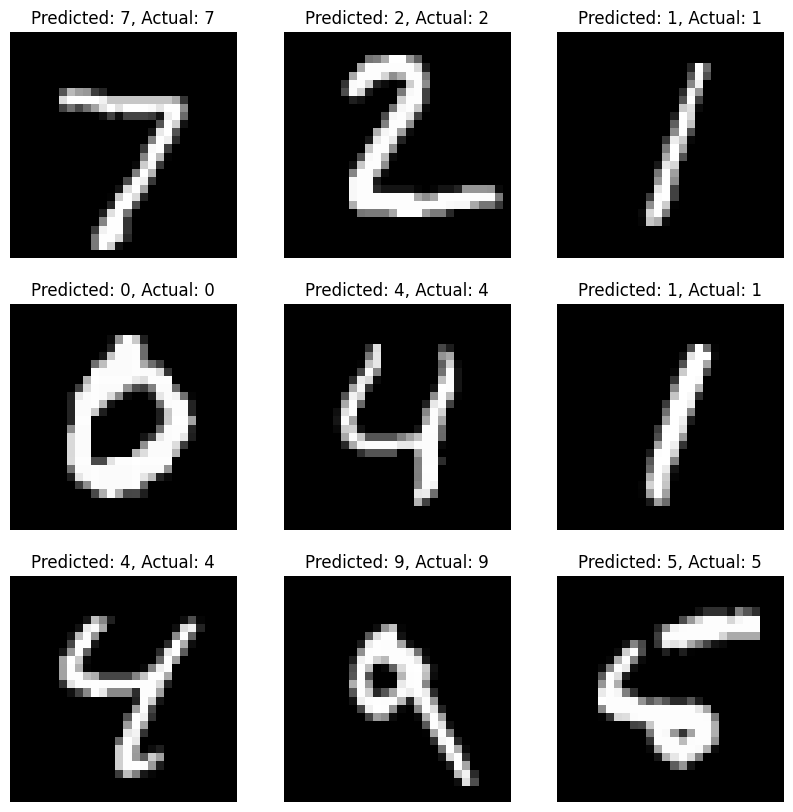

In [ ]:
predictions = model.predict(x_test)

# Convert softmax outputs to actual class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show 9 test images with predictions
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#Calculating the precision and recall and F1-score for each digit (0-9)
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



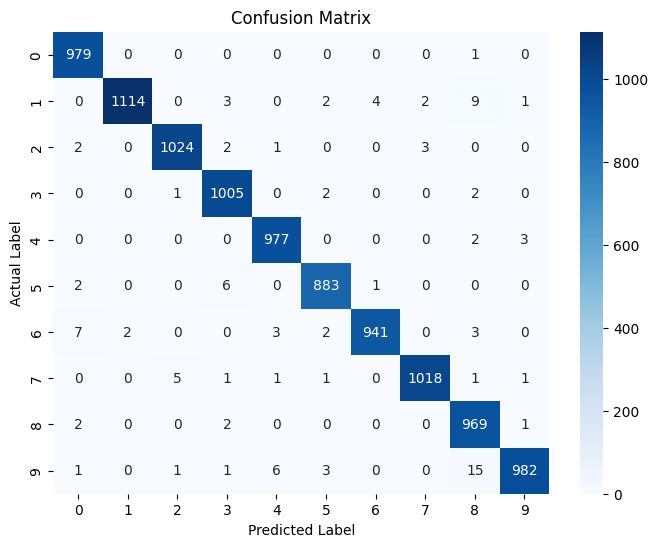

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Calculate AUC score
y_test_one_hot = to_categorical(y_test, num_classes=10)
auc_score = roc_auc_score(y_test_one_hot, predictions)
print("AUC Score:", auc_score)

AUC Score: 0.999931043524106
